### Project Title : Oil Price Prediction Using Forecasting Techniques


#### Problem Type : Univariate Forecasting

#### Actionable Decision :Price predicted for next day

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,5

import warnings as wn
wn.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Description :-

Data is collected from (https://in.investing.com/) between 23 Nov 2016 to 22 Nov 2021.

Data Dimensions: 1318 records and 7 features

Features:

1)Date : Date of trading

2)Price : Price of oil on particular trading day

3)Open: Opening Price of oil on particular trading day

4)High: Price recorded as high in particular trading day

5)Low: Price recorded as low in particular trading day

6)Volume: Volume of oil being traded in a particular training day

7)Change%: Change in volume with respect to previous trading day

In [2]:
crude=pd.read_csv("D:\\Project\\finalized dataset xcel\\crude oil price.csv")
crude.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,"Nov 24, 2021",78.84,78.24,78.98,78.03,0,0.43%
1,"Nov 23, 2021",78.50,76.46,78.86,75.30,0,2.28%
2,"Nov 22, 2021",76.75,75.75,77.16,74.76,465.77K,0.85%
3,"Nov 19, 2021",76.10,78.76,79.92,75.37,30.70K,-3.68%
4,"Nov 18, 2021",79.01,78.34,79.36,77.08,83.98K,0.83%


In [3]:
crude=crude.drop([0,1])
crude.head()

,Date,Price,Open,High,Low,Volume,Chg%
2,"Nov 22, 2021",76.75,75.75,77.16,74.76,465.77K,0.85%
3,"Nov 19, 2021",76.10,78.76,79.92,75.37,30.70K,-3.68%
4,"Nov 18, 2021",79.01,78.34,79.36,77.08,83.98K,0.83%
5,"Nov 17, 2021",78.36,80.54,80.69,77.69,174.47K,-2.97%
6,"Nov 16, 2021",80.76,80.93,81.81,80.03,325.67K,-0.15%


In [4]:
crude=crude.drop(range(1320,1820))
crude.tail()

,Date,Price,Open,High,Low,Volume,Chg%
1315,"Nov 29, 2016",45.23,46.88,46.98,44.82,732.82K,-3.93%
1316,"Nov 28, 2016",47.08,45.43,47.65,45.14,734.38K,2.21%
1317,"Nov 25, 2016",46.06,47.97,48.26,45.88,465.98K,-4.00%
1318,"Nov 24, 2016",47.98,48.03,48.26,47.80,0,0.04%
1319,"Nov 23, 2016",47.96,47.94,48.43,47.40,556.86K,-0.15%


In [5]:
crude=crude.reset_index(drop=True)
crude.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,"Nov 22, 2021",76.75,75.75,77.16,74.76,465.77K,0.85%
1,"Nov 19, 2021",76.10,78.76,79.92,75.37,30.70K,-3.68%
2,"Nov 18, 2021",79.01,78.34,79.36,77.08,83.98K,0.83%
3,"Nov 17, 2021",78.36,80.54,80.69,77.69,174.47K,-2.97%
4,"Nov 16, 2021",80.76,80.93,81.81,80.03,325.67K,-0.15%


In [6]:
crude.shape

(1318, 7)

In [7]:
from datetime import datetime

In [8]:
crude["Date "]=pd.to_datetime(crude["Date "])
crude.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2021-11-22,76.75,75.75,77.16,74.76,465.77K,0.85%
1,2021-11-19,76.10,78.76,79.92,75.37,30.70K,-3.68%
2,2021-11-18,79.01,78.34,79.36,77.08,83.98K,0.83%
3,2021-11-17,78.36,80.54,80.69,77.69,174.47K,-2.97%
4,2021-11-16,80.76,80.93,81.81,80.03,325.67K,-0.15%


In [9]:
crude=crude.dropna()
crude.shape

(1318, 7)

In [10]:
crude.dtypes

Date       datetime64[ns]
Price             float64
Open              float64
High              float64
Low               float64
Volume             object
Chg%               object
dtype: object

In [11]:
crude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 0 to 1317
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1318 non-null   datetime64[ns]
 1   Price    1318 non-null   float64       
 2   Open     1318 non-null   float64       
 3   High     1318 non-null   float64       
 4   Low      1318 non-null   float64       
 5   Volume   1318 non-null   object        
 6   Chg%     1318 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 82.4+ KB


In [12]:
crude.describe(include='all')

,Date,Price,Open,High,Low,Volume,Chg%
count,1318,1318.000000,1318.000000,1318.000000,1318.000000,1318,1318
unique,1318,NaN,NaN,NaN,NaN,1232,636
top,2021-11-22 00:00:00,NaN,NaN,NaN,NaN,0,0.13%
freq,1,NaN,NaN,NaN,NaN,60,10
first,2016-11-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-11-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,55.629879,55.637261,56.486343,54.724651,NaN,NaN
std,NaN,12.348480,12.203302,12.039665,12.480179,NaN,NaN
min,NaN,-37.630000,-14.000000,13.690000,-40.320000,NaN,NaN
25%,NaN,48.852500,48.782500,49.592500,48.162500,NaN,NaN


In [13]:
crude["Chg% "]=crude["Chg% "].replace('%','',regex=True)
crude.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2021-11-22,76.75,75.75,77.16,74.76,465.77K,0.85
1,2021-11-19,76.10,78.76,79.92,75.37,30.70K,-3.68
2,2021-11-18,79.01,78.34,79.36,77.08,83.98K,0.83
3,2021-11-17,78.36,80.54,80.69,77.69,174.47K,-2.97
4,2021-11-16,80.76,80.93,81.81,80.03,325.67K,-0.15


In [14]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K',''))*1000
        return 1000.0
    if 'M' in x:
        if len(x)>1:
            return float(x.replace('M',''))*1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B',''))*1000000000
    return 0.0

crude["Volume "]=crude["Volume "].apply(value_to_float)
    

In [15]:
crude.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2021-11-22,76.75,75.75,77.16,74.76,465770.0,0.85
1,2021-11-19,76.10,78.76,79.92,75.37,30700.0,-3.68
2,2021-11-18,79.01,78.34,79.36,77.08,83980.0,0.83
3,2021-11-17,78.36,80.54,80.69,77.69,174470.0,-2.97
4,2021-11-16,80.76,80.93,81.81,80.03,325670.0,-0.15


In [16]:
crude["Chg% "]=crude["Chg% "].astype(float)

In [17]:
crude=crude.drop_duplicates()

In [18]:
crude.describe()

,Price,Open,High,Low,Volume,Chg%
count,1318.000000,1318.000000,1318.000000,1318.000000,1.318000e+03,1318.000000
mean,55.629879,55.637261,56.486343,54.724651,4.995814e+05,-0.199135
std,12.348480,12.203302,12.039665,12.480179,2.684793e+05,9.643589
min,-37.630000,-14.000000,13.690000,-40.320000,0.000000e+00,-305.970000
25%,48.852500,48.782500,49.592500,48.162500,3.386325e+05,-0.997500
50%,55.935000,55.955000,56.745000,55.020000,5.184850e+05,0.210000
75%,63.995000,64.045000,64.887500,63.310000,6.878300e+05,1.230000
max,84.650000,84.530000,85.410000,83.390000,1.770000e+06,37.660000


In [19]:
crude.corr()

,Price,Open,High,Low,Volume,Chg%
Price,1.000000,0.986792,0.990525,0.996918,-0.021154,0.209576
Open,0.986792,1.000000,0.996344,0.989670,-0.011552,0.099165
High,0.990525,0.996344,1.000000,0.987547,-0.006360,0.091718
Low,0.996918,0.989670,0.987547,1.000000,-0.025022,0.221893
Volume,-0.021154,-0.011552,-0.006360,-0.025022,1.000000,0.020866
Chg%,0.209576,0.099165,0.091718,0.221893,0.020866,1.000000


In [20]:
crude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 0 to 1317
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1318 non-null   datetime64[ns]
 1   Price    1318 non-null   float64       
 2   Open     1318 non-null   float64       
 3   High     1318 non-null   float64       
 4   Low      1318 non-null   float64       
 5   Volume   1318 non-null   float64       
 6   Chg%     1318 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 82.4 KB


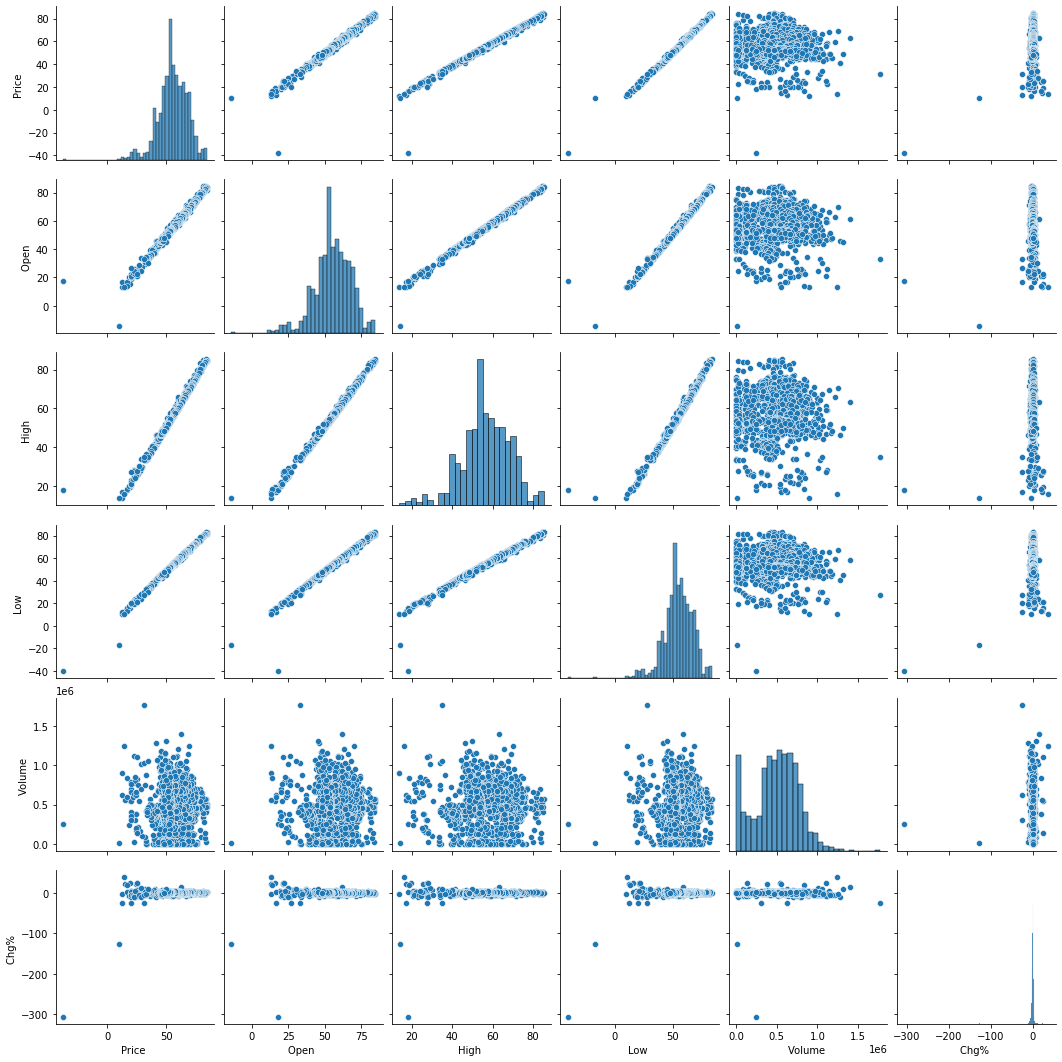

In [21]:
sns.pairplot(crude)

In [22]:
crudeoil=crude.iloc[:,0:2]
crudeoil.head()

,Date,Price
0,2021-11-22,76.75
1,2021-11-19,76.10
2,2021-11-18,79.01
3,2021-11-17,78.36
4,2021-11-16,80.76


In [23]:
crudeoil['Year']=pd.DatetimeIndex(crudeoil['Date ']).year
crudeoil['Month']=pd.DatetimeIndex(crudeoil['Date ']).month
crudeoil.head()

,Date,Price,Year,Month
0,2021-11-22,76.75,2021,11
1,2021-11-19,76.10,2021,11
2,2021-11-18,79.01,2021,11
3,2021-11-17,78.36,2021,11
4,2021-11-16,80.76,2021,11


<AxesSubplot:xlabel='Year', ylabel='Price '>

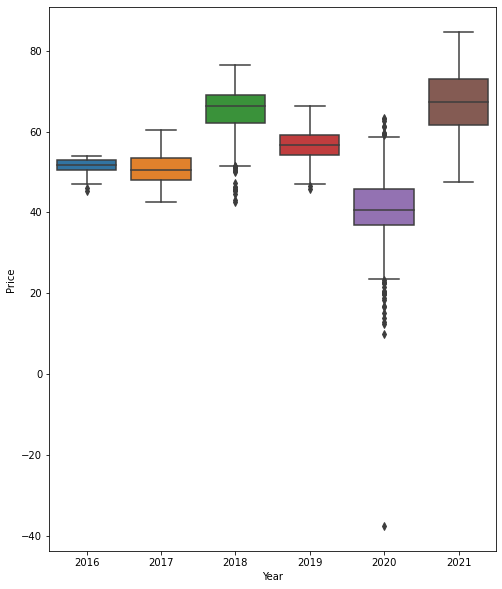

In [24]:
plt.figure(figsize=(8,10))
sns.boxplot(x='Year',y='Price ',data=crudeoil)

In [25]:
crudeoil["Price "].describe()

count    1318.000000
mean       55.629879
std        12.348480
min       -37.630000
25%        48.852500
50%        55.935000
75%        63.995000
max        84.650000
Name: Price , dtype: float64

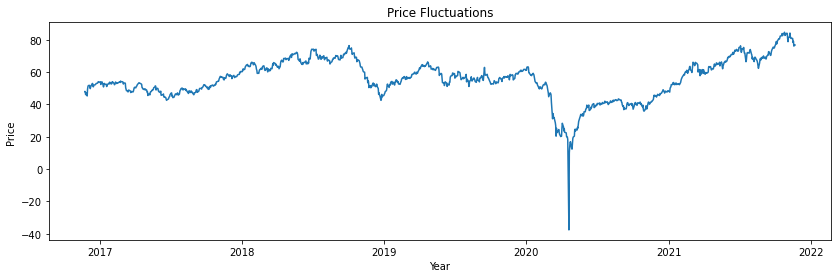

In [26]:
plt.figure(figsize=(14,4))
plt.plot(crudeoil['Date '],crudeoil['Price '])
plt.title('Price Fluctuations')
plt.xlabel('Year')
plt.ylabel('Price ')
plt.show()

<AxesSubplot:xlabel='Date '>

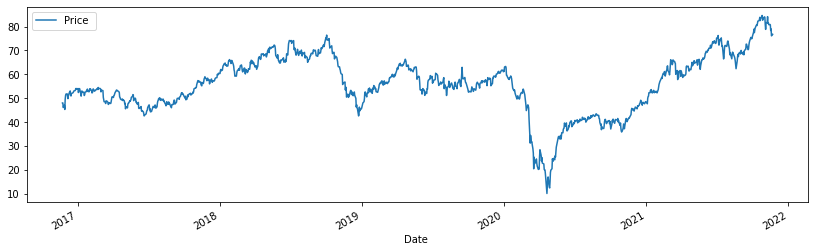

In [27]:
crudeoil=crudeoil[crudeoil['Price ']>0]
crudeoil.plot(x='Date ',y='Price ',figsize=(14,4))

<AxesSubplot:>

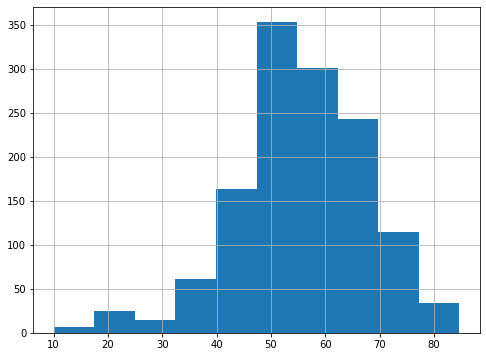

In [28]:
crudeoil=crudeoil[crudeoil['Price ']>0]
crudeoil["Price "].hist(figsize=(8,6))

<AxesSubplot:ylabel='Density'>

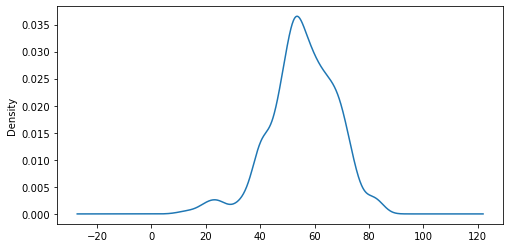

In [29]:
crudeoil['Price '].plot(kind='kde',figsize=(8,4))

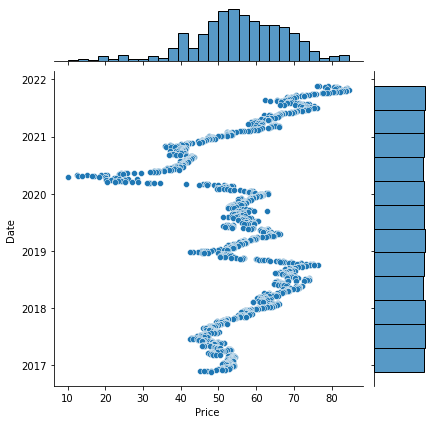

In [30]:
sns.jointplot(x='Price ',y='Date ',data=crudeoil,kind='scatter')
plt.show()

In [31]:
crudeoil['Year']=crudeoil['Year'].astype(int)


In [32]:
crudeoil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1317
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1317 non-null   datetime64[ns]
 1   Price   1317 non-null   float64       
 2   Year    1317 non-null   int32         
 3   Month   1317 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 46.3 KB


<AxesSubplot:xlabel='Year', ylabel='Month'>

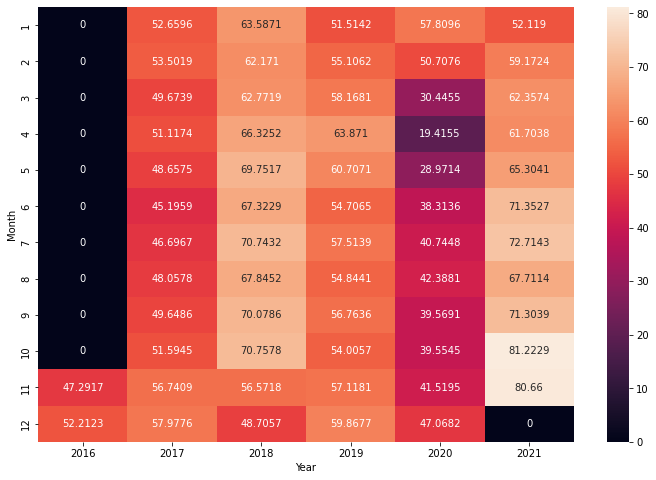

In [33]:
plt.figure(figsize=(12,8))
heatmap=pd.pivot_table(data=crudeoil,values='Price ',index='Month',columns='Year',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap,annot=True,fmt='g')

In [34]:
crudeoil=crude.sort_values(by='Date ',ascending=True)
crudeoil

,Date,Price,Open,High,Low,Volume,Chg%
1317,2016-11-23,47.96,47.94,48.43,47.40,556860.0,-0.15
1316,2016-11-24,47.98,48.03,48.26,47.80,0.0,0.04
1315,2016-11-25,46.06,47.97,48.26,45.88,465980.0,-4.00
1314,2016-11-28,47.08,45.43,47.65,45.14,734380.0,2.21
1313,2016-11-29,45.23,46.88,46.98,44.82,732820.0,-3.93
1312,2016-11-30,49.44,45.24,49.90,45.22,1310000.0,9.31
1311,2016-12-01,51.06,49.07,51.80,48.98,974810.0,3.28
1310,2016-12-02,51.68,51.01,51.73,50.18,667100.0,1.21
1309,2016-12-05,51.79,51.46,52.42,50.93,600780.0,0.21
1308,2016-12-06,50.93,50.97,51.60,50.28,642750.0,-1.66


In [35]:
crudeoil.set_index('Date ',inplace=True)
crudeoil.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2016-11-23,47.96,47.94,48.43,47.40,556860.0,-0.15
2016-11-24,47.98,48.03,48.26,47.80,0.0,0.04
2016-11-25,46.06,47.97,48.26,45.88,465980.0,-4.00
2016-11-28,47.08,45.43,47.65,45.14,734380.0,2.21
2016-11-29,45.23,46.88,46.98,44.82,732820.0,-3.93


In [36]:
crudeoil.corr()

,Price,Open,High,Low,Volume,Chg%
Price,1.000000,0.986792,0.990525,0.996918,-0.021154,0.209576
Open,0.986792,1.000000,0.996344,0.989670,-0.011552,0.099165
High,0.990525,0.996344,1.000000,0.987547,-0.006360,0.091718
Low,0.996918,0.989670,0.987547,1.000000,-0.025022,0.221893
Volume,-0.021154,-0.011552,-0.006360,-0.025022,1.000000,0.020866
Chg%,0.209576,0.099165,0.091718,0.221893,0.020866,1.000000


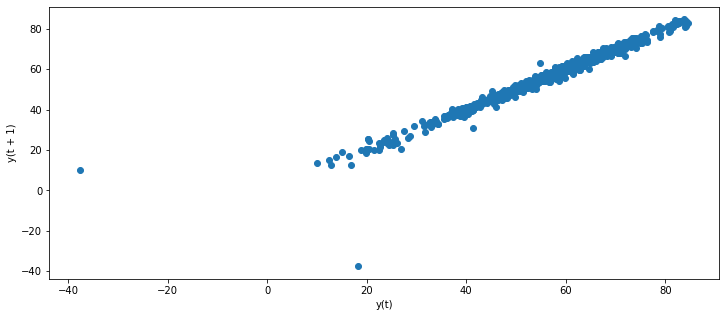

In [37]:
from pandas.plotting import lag_plot
lag_plot(crudeoil['Price '])
plt.show()

In [38]:
crudeoil.shape

(1318, 6)

In [39]:
df=pd.date_range(start="23-11-2016", end="22-11-2021").difference(crudeoil.index)
df

DatetimeIndex(['2016-11-26', '2016-11-27', '2016-12-03', '2016-12-04',
               '2016-12-10', '2016-12-11', '2016-12-17', '2016-12-18',
               '2016-12-24', '2016-12-25',
               ...
               '2021-10-23', '2021-10-24', '2021-10-30', '2021-10-31',
               '2021-11-06', '2021-11-07', '2021-11-13', '2021-11-14',
               '2021-11-20', '2021-11-21'],
              dtype='datetime64[ns]', length=508, freq=None)

In [40]:
s=pd.Series(df)
s.index=pd.DatetimeIndex(s.index)

In [41]:
s = s.reindex(df)

In [42]:
frames = [crudeoil,s]
dff = pd.concat(frames, axis=1)

In [43]:
dff.reset_index()

,index,Price,Open,High,Low,Volume,Chg%,0
0,2016-11-23,47.96,47.94,48.43,47.40,556860.0,-0.15,NaT
1,2016-11-24,47.98,48.03,48.26,47.80,0.0,0.04,NaT
2,2016-11-25,46.06,47.97,48.26,45.88,465980.0,-4.00,NaT
3,2016-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2016-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5,2016-11-28,47.08,45.43,47.65,45.14,734380.0,2.21,NaT
6,2016-11-29,45.23,46.88,46.98,44.82,732820.0,-3.93,NaT
7,2016-11-30,49.44,45.24,49.90,45.22,1310000.0,9.31,NaT
8,2016-12-01,51.06,49.07,51.80,48.98,974810.0,3.28,NaT
9,2016-12-02,51.68,51.01,51.73,50.18,667100.0,1.21,NaT


In [44]:
dff.drop(dff.iloc[:, 1:8], inplace = True, axis = 1)
  
dff.head(50)

,Price
2016-11-23,47.96
2016-11-24,47.98
2016-11-25,46.06
2016-11-26,NaN
2016-11-27,NaN
2016-11-28,47.08
2016-11-29,45.23
2016-11-30,49.44
2016-12-01,51.06
2016-12-02,51.68


In [45]:
crudeoil=dff

In [46]:
crudeoil.isnull().sum()

Price     508
dtype: int64

In [47]:
crudeoil['Price '].fillna(crudeoil['Price '].median(), inplace=True)

In [48]:
crudeoil.head(50)

,Price
2016-11-23,47.960
2016-11-24,47.980
2016-11-25,46.060
2016-11-26,55.935
2016-11-27,55.935
2016-11-28,47.080
2016-11-29,45.230
2016-11-30,49.440
2016-12-01,51.060
2016-12-02,51.680


<AxesSubplot:>

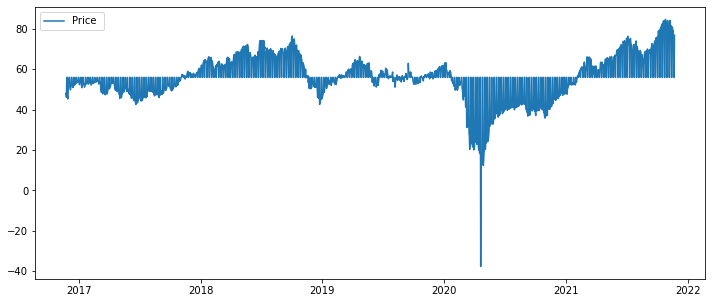

In [49]:
#line plot for the prices
sns.lineplot(data=crudeoil)

# Outlier Detection

In [50]:
Q1=np.percentile(crudeoil["Price "],10, interpolation="midpoint")
Q3=np.percentile(crudeoil["Price "],90, interpolation="midpoint")

In [51]:
Q3,Q1

(68.67, 42.825)

In [52]:
crudeoil['Price '] = np.where((crudeoil["Price "] >Q3),Q3,crudeoil["Price "])

In [53]:
crudeoil['Price '] = np.where((crudeoil["Price "] <Q1),Q1,crudeoil["Price "])

<AxesSubplot:>

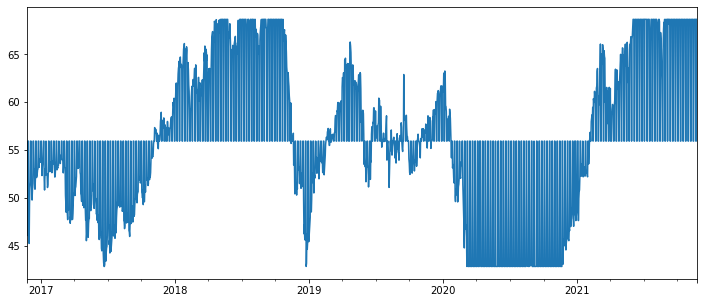

In [54]:
crudeoil["Price "].plot()

# Train Test Split

In [55]:
crudeoil.head()

,Price
2016-11-23,47.960
2016-11-24,47.980
2016-11-25,46.060
2016-11-26,55.935
2016-11-27,55.935


In [56]:
train_size = int(len(crudeoil) * 0.97)
train, test = crudeoil[0:train_size], crudeoil[train_size:]

In [57]:
train.shape,test.shape

((1771, 1), (55, 1))

In [58]:
crudeoil.head()

,Price
2016-11-23,47.960
2016-11-24,47.980
2016-11-25,46.060
2016-11-26,55.935
2016-11-27,55.935


<AxesSubplot:>

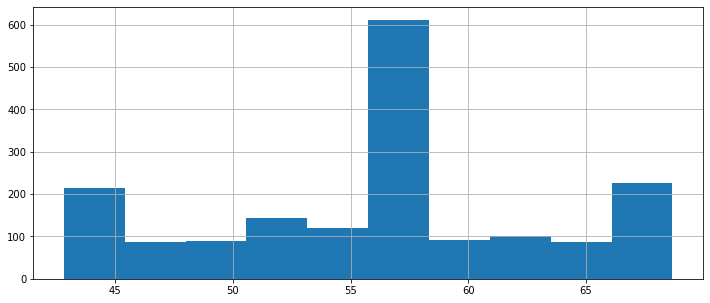

In [59]:
train['Price '].hist()

## To Check Stationarity of Data

In [60]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(train['Price '],autolag='AIC')

print("Result of Dickey Fuller Test")
dfoutput=pd.Series(adf_test[0:4],index=['Test Statistic','p-value','Lags Used','No of observations'])
for key,value in adf_test[4].items():
    dfoutput['Critical Value(%s)'%key]=value
    
print(dfoutput)

Result of Dickey Fuller Test
Test Statistic           -1.513987
p-value                   0.526581
Lags Used                22.000000
No of observations     1748.000000
Critical Value(1%)       -3.434097
Critical Value(5%)       -2.863195
Critical Value(10%)      -2.567651
dtype: float64


Test Statistic is   -1.513987 is greater than any critical values. p-value is   0.526581

The p-value obtained is more than significance level of 0.05 and the ADF statistic is more than any of the critical values.

Clearly, there is reason to accept the null hypothesis. So, the time series is  not stationary.

## To make Data Stationary

In [61]:
crudeoil['30day_rolling_avg']=crudeoil['Price '].rolling(30).mean()

<AxesSubplot:ylabel='Price '>

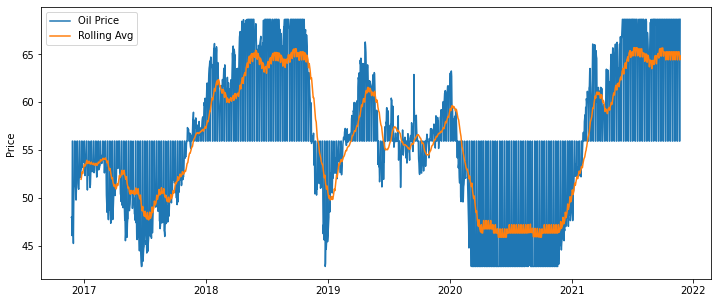

In [62]:
sns.lineplot(data=crudeoil['Price '],label='Oil Price')
sns.lineplot(data=crudeoil['30day_rolling_avg'],label='Rolling Avg')

In [63]:
rolmean=crudeoil['Price '].rolling(window=12).mean()
rolstd=crudeoil['Price '].rolling(window=12).std()

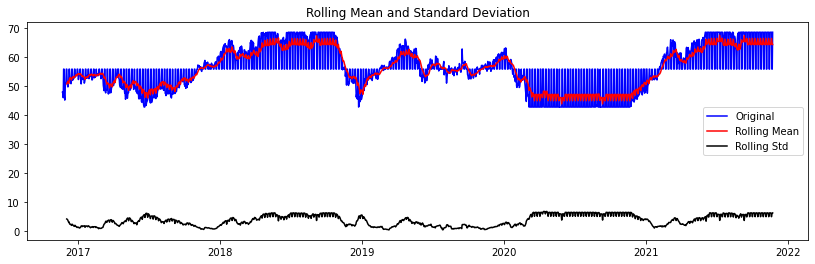

In [64]:
plt.figure(figsize=(14,4))
orig=plt.plot(crudeoil['Price '],color="blue",label="Original")
mean=plt.plot(rolmean,color="red",label="Rolling Mean")
std=plt.plot(rolstd,color="black",label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

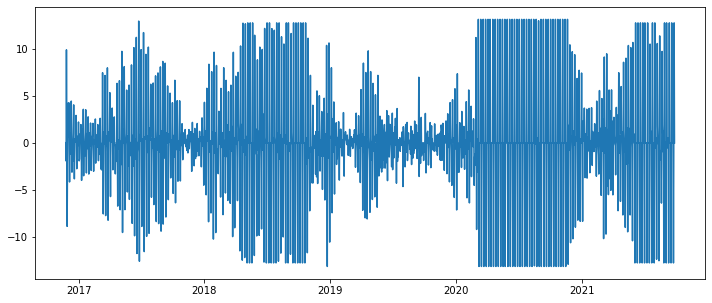

In [65]:
DiffShifting=train['Price ']-train['Price '].shift(1)
DiffShifting.dropna(inplace=True)
plt.plot(DiffShifting)

In [66]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(DiffShifting,autolag='AIC')

print("Result of Dickey Fuller Test")
dfoutput=pd.Series(adf_test[0:4],index=['Test Statistic','p-value','Lags Used','No of observations'])
for key,value in adf_test[4].items():
    dfoutput['Critical Value(%s)'%key]=value
    
print(dfoutput)

Result of Dickey Fuller Test
Test Statistic        -9.995020e+00
p-value                1.950556e-17
Lags Used              2.100000e+01
No of observations     1.748000e+03
Critical Value(1%)    -3.434097e+00
Critical Value(5%)    -2.863195e+00
Critical Value(10%)   -2.567651e+00
dtype: float64


Test Statistic is   -9.995020e+00 is less than any critical values. p-value is  1.950556e-17

The p-value obtained is less than significance level of 0.05 and the ADF statistic is less than any of the critical values.

Clearly, there is reason to reject the null hypothesis. So, the time series is  stationary.

<AxesSubplot:>

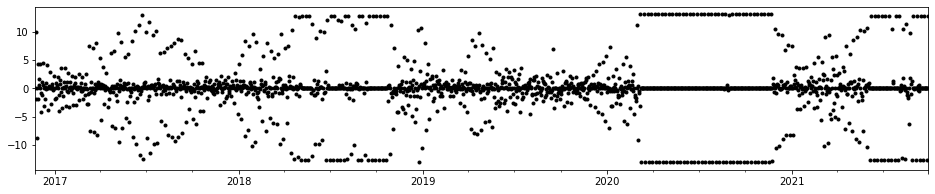

In [67]:
#Scatterplot for prices
DiffShifting.plot(style='k.',figsize=(16,3))

<AxesSubplot:ylabel='Density'>

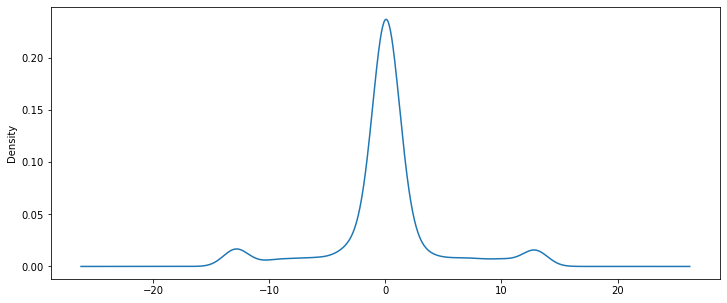

In [68]:
#Density plot for prices to check the skewness in data
DiffShifting.plot(kind="kde")

## Check Seasonality,Trend and Residual

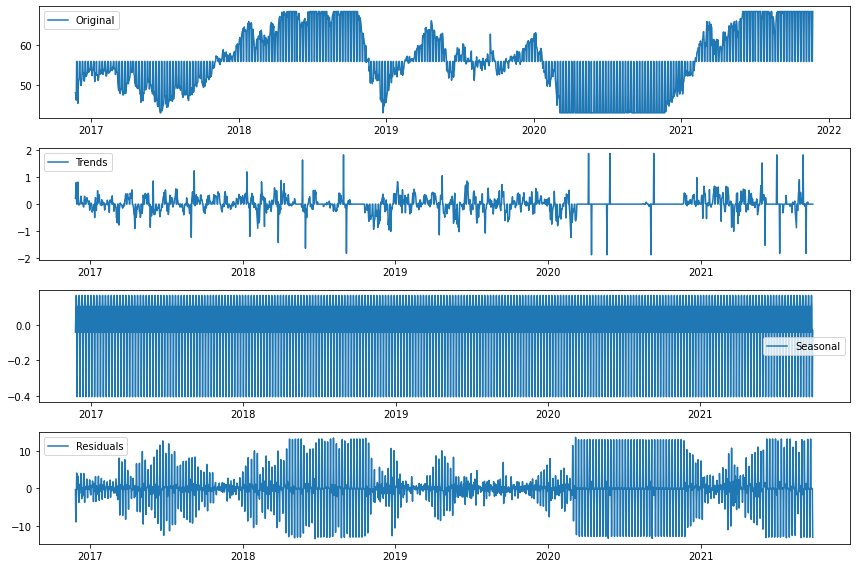

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(DiffShifting,period=7)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(crudeoil['Price '],label='Original')
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend,label='Trends')
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc="best")
plt.tight_layout()


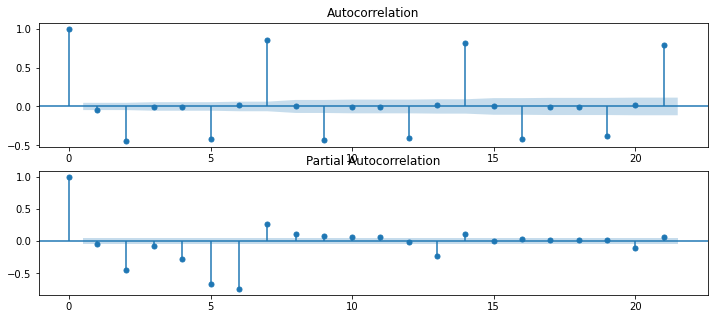

In [70]:
#ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = plot_acf(DiffShifting,lags=21,ax=ax1)
ax2 = fig.add_subplot(212)
fig=  plot_pacf(DiffShifting,lags=21,ax=ax2)
plt.show()

In [71]:
crudeoil.shape

(1826, 2)

In [72]:
import itertools
p=d=q=range(0,3)

pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

print('Example of parameter combination for seasonal arima')
print('SARIMAX: {} x {} '.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {} '.format(pdq[2],seasonal_pdq[2]))
print('SARIMAX: {} x {} '.format(pdq[3],seasonal_pdq[3]))
print('SARIMAX: {} x {} '.format(pdq[4],seasonal_pdq[4]))
print('SARIMAX: {} x {} '.format(pdq[5],seasonal_pdq[5]))

Example of parameter combination for seasonal arima
SARIMAX: (0, 0, 1) x (0, 0, 1, 12) 
SARIMAX: (0, 0, 2) x (0, 0, 2, 12) 
SARIMAX: (0, 1, 0) x (0, 1, 0, 12) 
SARIMAX: (0, 1, 1) x (0, 1, 1, 12) 
SARIMAX: (0, 1, 2) x (0, 1, 2, 12) 


In [73]:
metric_aic_dict=dict()

for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        try:
            model=sm.tsa.statespace.SARIMAX(train['Price '],
                                           order=pm,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            model_aic=model.fit()
            print('ARIMA {} x {} 12- AIC:{}'.format(pm,pm_seasonal,model_aic.aic))
            metric_aic_dict.update({(pm,pm_seasonal):model_aic.aic})
        except:
            continue

In [74]:
{k:v for k,v in sorted(metric_aic_dict.items(),key=lambda x:x[1])}

{}

In [75]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(train['Price '],
                                order=(4,1,4),
                                seasonal_order=(4,2,4,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_aic=model.fit()

C:\Users\shefs\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
print(model_aic.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7950      0.009     86.183      0.000       0.777       0.813
ar.L2         -1.4123      0.010   -136.166      0.000      -1.433      -1.392
ar.L3          0.7898      0.009     86.352      0.000       0.772       0.808
ar.L4         -0.9568      0.008   -115.561      0.000      -0.973      -0.941
ma.L1         -1.3061      0.020    -65.256      0.000      -1.345      -1.267
ma.L2          1.3832      0.035     39.536      0.000       1.315       1.452
ma.L3         -1.0081      0.035    -29.135      0.000      -1.076      -0.940
ma.L4          0.5610      0.026     21.469      0.000       0.510       0.612
ar.S.L12      -1.0594      0.065    -16.314      0.000      -1.187      -0.932
ar.S.L24      -0.5426      0.063     -8.597      0.000      -0.666      -0.419
ar.S.L36       0.1505      0.048      3.134      0.0

In [78]:
model_aic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Price    No. Observations:                 1771
Model:             SARIMAX(4, 1, 4)x(4, 2, 4, 12)   Log Likelihood               -3811.394
Date:                            Wed, 12 Jan 2022   AIC                           7656.788
Time:                                    17:49:36   BIC                           7749.170
Sample:                                11-23-2016   HQIC                          7690.995
                                     - 09-28-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7950      0.009     86.183      0.000       0.777       0.813
ar.L2         -1.4123      0.010   -136.166      0.000      -1.433      -1.392
ar.L3          0.7898      0.009     86.352      0.000       0.772       0.808
ar.L4         -0.9568      0.008   -115.561      0.000      -0.973      -0.941
ma.L1         -1.3061      0.020    -65.256      0.000      -1.345      -1.267
ma.L2          1.3832      0.035     39.536      0.000       1.315       1.452
ma.L3         -1.0081      0.035    -29.135      0.000      -1.076      -0.940
ma.L4          0.5610      0.026     21.469      0.000       0.510       0.612
ar.S.L12      -1.0594      0.065    -16.314      0.000      -1.187      -0.932
ar.S.L24      -0.5426      0.063     -8.597      0.000      -0.666      -0.419
ar.S.L36       0.1505      0.048      3.134      0.002       0.056       0.245
ar.S.L48      -0.1050      0.030     -3.555      0.000      -0.163      -0.047
ma.S.L12      -0.5950      0.066     -9.014      0.000      -0.724      -0.466
ma.S.L24      -0.8717      0.093     -9.385      0.000      -1.054      -0.690
ma.S.L36      -0.4165      0.074     -5.623      0.000      -0.562      -0.271
ma.S.L48       0.8875      0.054     16.409      0.000       0.782       0.994
sigma2         5.2549      0.182     28.929      0.000       4.899       5.611
===================================================================================
Ljung-Box (L1) (Q):                  83.85   Jarque-Bera (JB):              1559.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.79   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
train.index

DatetimeIndex(['2016-11-23', '2016-11-24', '2016-11-25', '2016-11-26',
               '2016-11-27', '2016-11-28', '2016-11-29', '2016-11-30',
               '2016-12-01', '2016-12-02',
               ...
               '2021-09-19', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24', '2021-09-25', '2021-09-26',
               '2021-09-27', '2021-09-28'],
              dtype='datetime64[ns]', length=1771, freq='D')

In [80]:
predict_train = model_aic.predict(start=pd.to_datetime('2016-11-23'),end=pd.to_datetime('2021-09-28'))

<AxesSubplot:>

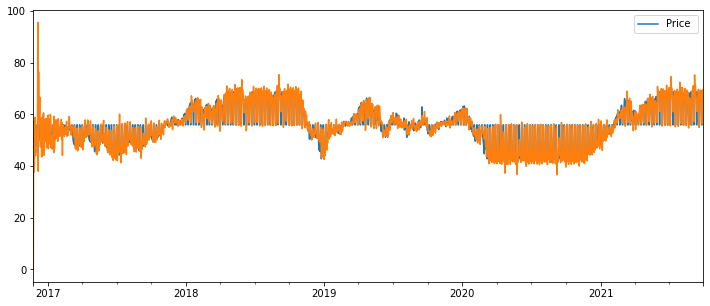

In [81]:
train.plot()
predict_train.plot()

In [82]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(train,predict_train)

0.03388544863828091

In [83]:
test.index

DatetimeIndex(['2021-09-29', '2021-09-30', '2021-10-01', '2021-10-02',
               '2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10',
               '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
               '2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18',
               '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22',
               '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26',
               '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
               '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07',
               '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11',
               '2021-11-12', '2021-11-13', '2021-11-14', '2021-11-15',
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-20', '2021-11-21', '2021-11-22'],
              dtype

In [86]:
predict_test = model_aic.predict(start=pd.to_datetime('2021-09-29'),end=pd.to_datetime('2021-11-22'))

In [87]:
mean_absolute_percentage_error(test,predict_test)

0.03113362851907172

<AxesSubplot:>

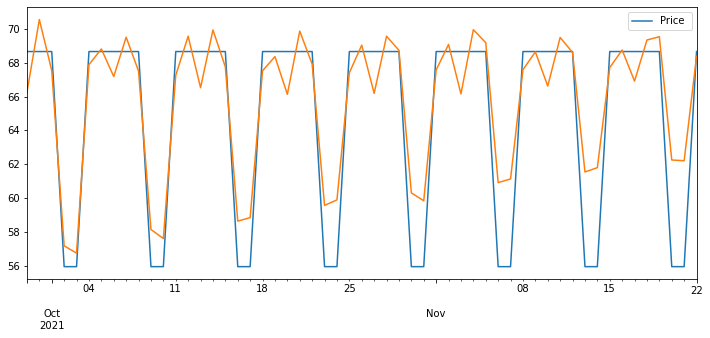

In [88]:
test.plot()
predict_test.plot()

In [89]:
forecast = model_aic.predict(start=pd.to_datetime('2021-11-23'),end=pd.to_datetime('2021-12-14'))

<AxesSubplot:>

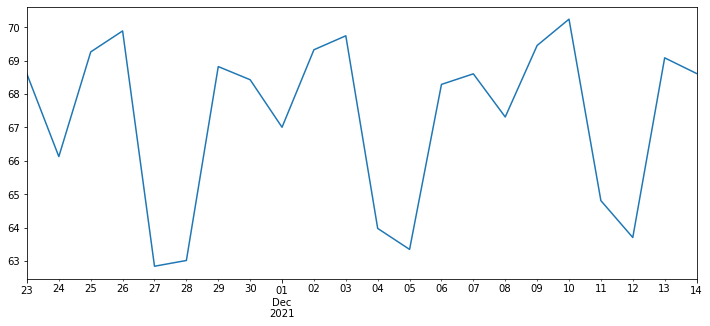

In [90]:
forecast.plot()

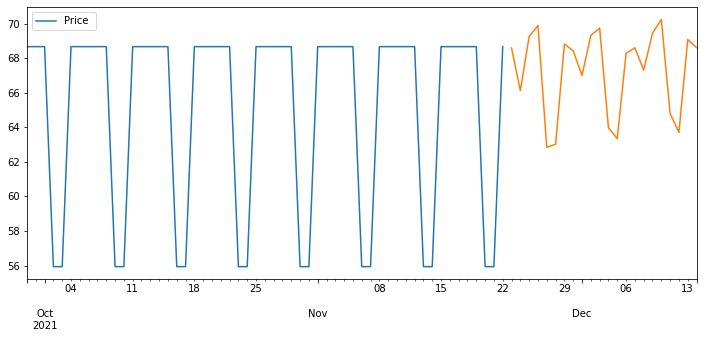

In [92]:
test.plot()
forecast.plot()
plt.show()

In [93]:
import pickle
with open("model_f_pickle", "wb") as f:
    pickle.dump(model_aic,f)

In [94]:
with open("model_f_pickle", "rb") as f:
    mp=pickle.load(f)

In [95]:
mp.forecast(steps=15)

2021-09-29    66.259480
2021-09-30    70.563985
2021-10-01    67.541068
2021-10-02    57.167134
2021-10-03    56.737209
2021-10-04    67.891745
2021-10-05    68.824177
2021-10-06    67.189811
2021-10-07    69.519075
2021-10-08    67.512344
2021-10-09    58.135681
2021-10-10    57.598614
2021-10-11    67.261495
2021-10-12    69.579245
2021-10-13    66.532773
Freq: D, Name: predicted_mean, dtype: float64